In [ ]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Load the image
img = cv2.imread('/content/pic123.png')

In [ ]:
# Create a mask
mask = np.zeros(img.shape[:2],np.uint8)

# Specify the background and foreground models
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)


In [ ]:
# Define the rectangle for initial segmentation (adjust as needed)
rect = (50,50,450,290)

# Apply GrabCut algorithm
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# Modify the mask to include probable background and probable foreground
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# Apply the mask to the original image
segmented_img = img * mask2[:,:,np.newaxis]

(Text(0.5, 1.0, 'Original Image'), ([], []), ([], []))

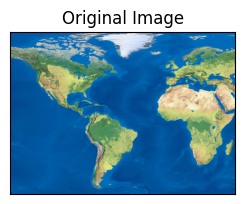

In [ ]:
# Display the original and segmented images
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])


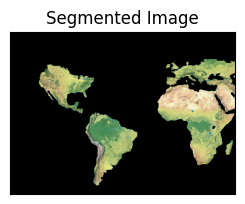

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.subplot(122),plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.savefig('seg.png')

##Graph Plotting

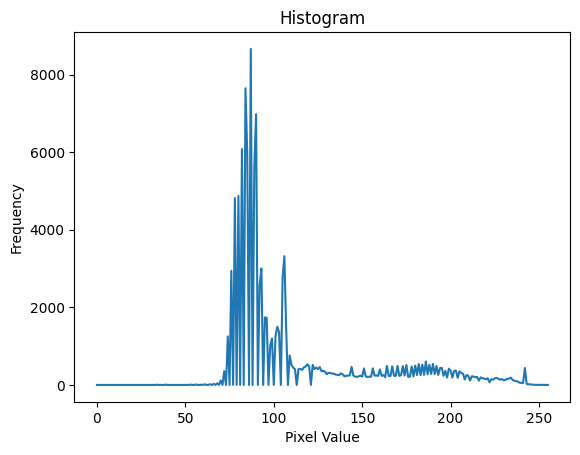

In [ ]:
# Load original image
image = cv2.imread('/content/pic123.png', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
hist = cv2.calcHist([image], [0], None, [256], [0,256])

# Plot histogram
plt.plot(hist)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

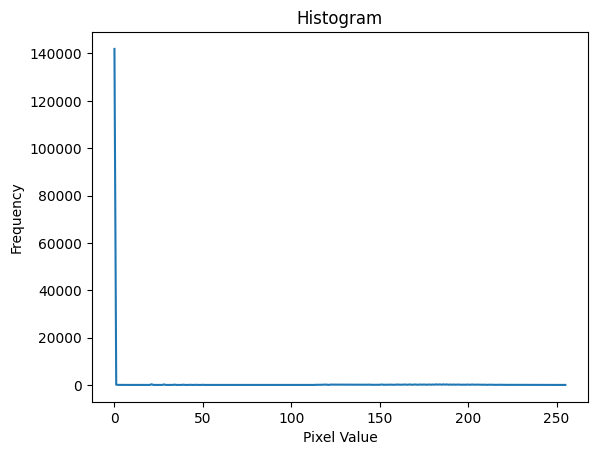

In [ ]:
# Load segmented image
image = cv2.imread('/content/seg2.png', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
hist = cv2.calcHist([image], [0], None, [256], [0,256])

# Plot histogram
plt.plot(hist)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

##metrics

In [ ]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load images
image1 = cv2.imread('/content/pic123.png')
image2 = cv2.imread('/content/seg2.png')

# Resize images to the same size for comparison
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

# Convert images to grayscale for SSIM calculation
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(image1.flatten(), image2.flatten())

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(image1.flatten(), image2.flatten())

# Compute Peak Signal-to-Noise Ratio (PSNR)
psnr = cv2.PSNR(image1, image2)

# Compute Structural Similarity Index (SSIM)
ssim_index = ssim(gray1, gray2)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Peak Signal-to-Noise Ratio (PSNR):", psnr)
print("Structural Similarity Index (SSIM):", ssim_index)

Mean Squared Error (MSE): 93.30836762688615
Mean Absolute Error (MAE): 119.1846622085048
Peak Signal-to-Noise Ratio (PSNR): 6.200688379976057
Structural Similarity Index (SSIM): 0.01380347306687828
